# Convolutional Neural Network - Skin Cancer Classifier

In this Project I will use an open dataset from Kaggle of skin cancer images. This CNN classifier will predict if an image of a skin lesion is malignant of benign.

I will be using the following workflow to create this model:
- Load malign/benign images and their corresponding labels
- Shuffle all images
- Split images into a training and test set
- Define two classes: 1 = malign / 0 = benign
- Apply a CNN to train the network
- Use accuracy to measure the model results
- Save the model

Original dataset is available on https://www.kaggle.com/fanconic/skin-cancer-malignant-vs-benign/code

### Importing the Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import os
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

###  Setting Initial Variables

In [2]:
RANDOM_STATE = 98

In [3]:
tumor_classes = 2

In [4]:
# Input image dimensions are a 120 x 120 Matrix and 3 channels(RGB colors)
first_input = (120,120,3)

### Create Features and Labels

#### I. Exract the Images

In [5]:
# Define the image directory:
# alternaive test path: data_experiment/train/benign/     and     data_experiment/train/malignant/
image_dir_benign = 'data/train/benign/'
image_dir_malignant = 'data/train/malignant/'

In [6]:
def extract_images(image_directory: str):
    ''' This function returns a list of images'''
    image_dir=os.listdir(image_directory)
    show_list = []
    for img in image_dir:
        if img != '.DS_Store':
            ext_img = image.load_img(str(image_directory+img), target_size=(120, 120))
            show_list.append(ext_img)
    #show_img = ext_img
    return show_list

In [7]:
# Extract two arrays of images, benign and malignant:
benign_images = extract_images(image_dir_benign)
malignant_images = extract_images(image_dir_malignant)

In [78]:
def show_samples():
    for i in range(1,4):
        plt.subplot(1, 3, i)
        plt.imshow(malignant_images[i])

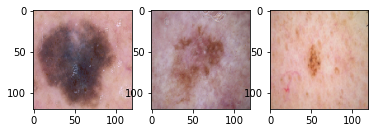

In [79]:
show_samples()

#### II. Create Final Features X and y

In [10]:
# Create X_malignant
def create_feature_label_array(image_list):
    '''Return a numpy array of all images'''
    feature_images= []
    for image in image_list:
        data = np.asarray( image )
        feature_images.append(data)

    feature_images = np.array(feature_images)
    return feature_images

In [11]:
# Create labels where each malignant image is labeled as 1
X_malignant = create_feature_label_array(malignant_images)
y_malignant = np.ones(len(X_malignant))

# Show the shapes of the features and labels
X_malignant.shape, y_malignant.shape

((1197, 120, 120, 3), (1197,))

In [12]:
# Create labels where each benign skin leasion is labeled as 0
X_benign = create_feature_label_array(benign_images)
y_benign = np.zeros(len(X_benign))
X_benign.shape,y_benign.shape

((1440, 120, 120, 3), (1440,))

In [13]:
# Concatenate both malignant and benign features/labels, show their shape
X = np.concatenate((X_malignant,X_benign))
y = np.concatenate((y_malignant,y_benign))

# Scale the images:
X = X/255
# X is a 4D tensor
X.shape,y.shape

((2637, 120, 120, 3), (2637,))

#### III. Shuffle and Split Into Train and Test

In [14]:
np_shuffler = np.random.permutation(len(X))
X = X[np_shuffler]
y = y[np_shuffler]

In [15]:
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.20, random_state=42)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=RANDOM_STATE)

In [17]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((2109, 120, 120, 3), (528, 120, 120, 3), (2109,), (528,))

#### IV. Normalize Values

In [18]:
def normalize_values(X_features):
    X_temp = X_features.shape[0:3]
    X_temp = X_features.astype("float32")/255
    print(X_temp.shape)
    return X_temp

### Create CNN Model

If we had more than 2 classes then you should one-hot-encode the classes. The output dense layer should be 'softmax' for multiclass classification.

In [19]:
# Convert class vectors to binary class matrices to feed the model.
# One-hot encode using this:
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

In [20]:
# define the keras model that will be used to train the data
model = keras.Sequential(
    [
        # shape is the input shape and the first layer is a convolutional layer
        keras.Input(shape=first_input),
        # create a convolution layer with 32 filters, each 3x3
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),

        # create a max pooling layer with pool size 2x2
        layers.MaxPooling2D(pool_size=(2, 2)),

        # create a convolution layer with 64 filters, each 3x3
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),

        # create a max pooling layer with pool size 2x2
        layers.MaxPooling2D(pool_size=(2, 2)),

        # Flatten the 2D arrays of the feature maps into 1D vectors
        
        
        # can be put between every layer
        layers.Flatten(),
        
        layers.Dropout(0.5),
        layers.Dense(128, activation="relu"),
        # num_classes is the number of classes we want to predict
        # the output will be a vector of length num_classes
        # the output layer will have this many nodes: num_classes
       
        layers.Dense(1, activation="sigmoid"),
    ]
)

2021-11-26 14:25:11.700916: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-26 14:25:11.715225: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dropout (Dropout)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [22]:
batch_size = 100
epochs = 20

In [23]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Train on 1898 samples, validate on 211 samples
Epoch 1/20
1898/1898 [==============================] - 67s 35ms/sample - loss: 0.8185 - accuracy: 0.5364 - val_loss: 0.6501 - val_accuracy: 0.5403
Epoch 2/20
1898/1898 [==============================] - 67s 35ms/sample - loss: 0.5483 - accuracy: 0.7318 - val_loss: 0.4879 - val_accuracy: 0.7251
Epoch 3/20
1898/1898 [==============================] - 65s 34ms/sample - loss: 0.4492 - accuracy: 0.7724 - val_loss: 0.4821 - val_accuracy: 0.7299
Epoch 4/20
1898/1898 [==============================] - 65s 34ms/sample - loss: 0.4604 - accuracy: 0.7787 - val_loss: 0.4684 - val_accuracy: 0.7773
Epoch 5/20
1898/1898 [==============================] - 65s 34ms/sample - loss: 0.4533 - accuracy: 0.7745 - val_loss: 0.4567 - val_accuracy: 0.7678
Epoch 6/20
1898/1898 [==============================] - 65s 34ms/sample - loss: 0.4279 - accuracy: 0.7929 - val_loss: 0.4633 - val_accuracy: 0.7299
Epoch 7/20
1898/1898 [==============================] - 64s 34ms/

During the first round of training we did 20 epochs to achieve an accuracy of 86%.

In [ ]:
#plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])

In [51]:
second_epochs = 10

We initially trained the model for 20 epochs and will continue to train it for more. To do this we will use `model.fit()` method again to continue training

In [52]:
model.fit(X_train, y_train, batch_size=batch_size, epochs=second_epochs, validation_split=0.1)

Train on 1898 samples, validate on 211 samples
Epoch 1/10
1898/1898 [==============================] - 66s 35ms/sample - loss: 0.2678 - accuracy: 0.8851 - val_loss: 0.4765 - val_accuracy: 0.7773
Epoch 2/10
1898/1898 [==============================] - 65s 34ms/sample - loss: 0.2702 - accuracy: 0.8788 - val_loss: 0.4233 - val_accuracy: 0.7867
Epoch 3/10
1898/1898 [==============================] - 66s 35ms/sample - loss: 0.2402 - accuracy: 0.8925 - val_loss: 0.4216 - val_accuracy: 0.7820
Epoch 4/10
1898/1898 [==============================] - 65s 34ms/sample - loss: 0.2215 - accuracy: 0.9115 - val_loss: 0.4283 - val_accuracy: 0.7867
Epoch 5/10
1898/1898 [==============================] - 67s 35ms/sample - loss: 0.2219 - accuracy: 0.8999 - val_loss: 0.4556 - val_accuracy: 0.7915
Epoch 6/10
1898/1898 [==============================] - 64s 34ms/sample - loss: 0.2210 - accuracy: 0.8988 - val_loss: 0.4472 - val_accuracy: 0.7915
Epoch 7/10
1898/1898 [==============================] - 64s 34ms/

In [77]:
#plt.plot(hist.history['loss'], label='Training loss')
#plt.plot(hist.history['val_loss'], label='Validation loss')
#plt.xlabel('Epochs')
#plt.ylabel('Loss')
#plt.legend()

In [53]:
model.save("alpha_model4.h5")

### Loading our Saved Model

In [54]:
new_mod = keras.models.load_model("alpha_model4.h5")


In [55]:
new_mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dropout (Dropout)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [56]:
image1 = np.asarray( malignant_images[1] )
image1=image1.reshape(1,120, 120, 3)
#image1.shape

mgt_temp = image.img_to_array(benign_images[22]) 
mgt_temp = mgt_temp.reshape(1,120, 120, 3)
new_mod.predict(mgt_temp)
#result = new_mod.predict(malignant_images[1])

array([[0.]], dtype=float32)

### Visualizing Layers

In [57]:
from matplotlib import pyplot as plt
from tensorflow.keras import Model

In [58]:
# Show the model layers
new_mod.layers

In [59]:
new_mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dropout (Dropout)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

In [80]:
intermediate_layer_model = Model(inputs=new_mod.input,
                                 outputs=[
                                     new_mod.get_layer(index=0).output,
                                     new_mod.get_layer(index=3).output
                                 ])

In [81]:
new_mod.get_layer(index=2)

In [82]:
data_image1 = np.asarray( malignant_images[11] )
data_image1=data_image1.reshape(1,120, 120, 3)
data_image1.shape

(1, 120, 120, 3)

In [83]:
cnn2, cnn5 = intermediate_layer_model.predict(data_image1)

In [84]:
cnn2.shape, cnn5.shape

((1, 118, 118, 32), (1, 28, 28, 64))

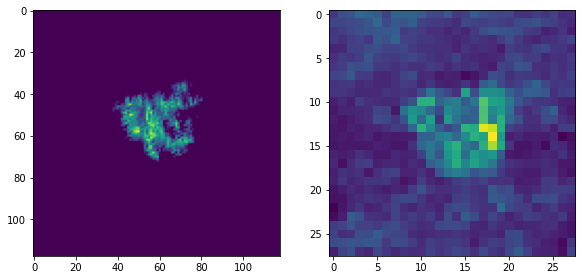

In [93]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cnn2[0,:, :, 0])

plt.subplot(1, 3, 2)
plt.imshow(cnn5[0,:, :, 3])


### Testing the Model

In the following section I will use the scikit learn accuracy score method to predict how well our model makes prediction on the test set

In [66]:
X_test.shape

(528, 120, 120, 3)

In [67]:
pred_test= new_mod.predict(X_test)

In [68]:
pred_test[:3]

array([[0.9666712 ],
       [0.94755805],
       [0.00122827]], dtype=float32)

In [69]:
y_test[:3]

array([1., 0., 0.])

In [70]:
pred_test[pred_test>=0.5] = 1
pred_test[pred_test<0.5] = 0

In [71]:
pred_test[:3]

array([[1.],
       [1.],
       [0.]], dtype=float32)

In [72]:
accuracy_score(pred_test,y_test)

0.8314393939393939

### Docker Image with a Tensorflow Model

The code in this Jupyter Notebook is also available as a python scipt that I put inside a docker image. The image runs the Convoluted Neural Network and outputs the final model as "docker_alpha_model.h5" into the local hosts directory. 

Below is a representation of the output, we can see that after running my docker image it outputs the final model into the local directory. 

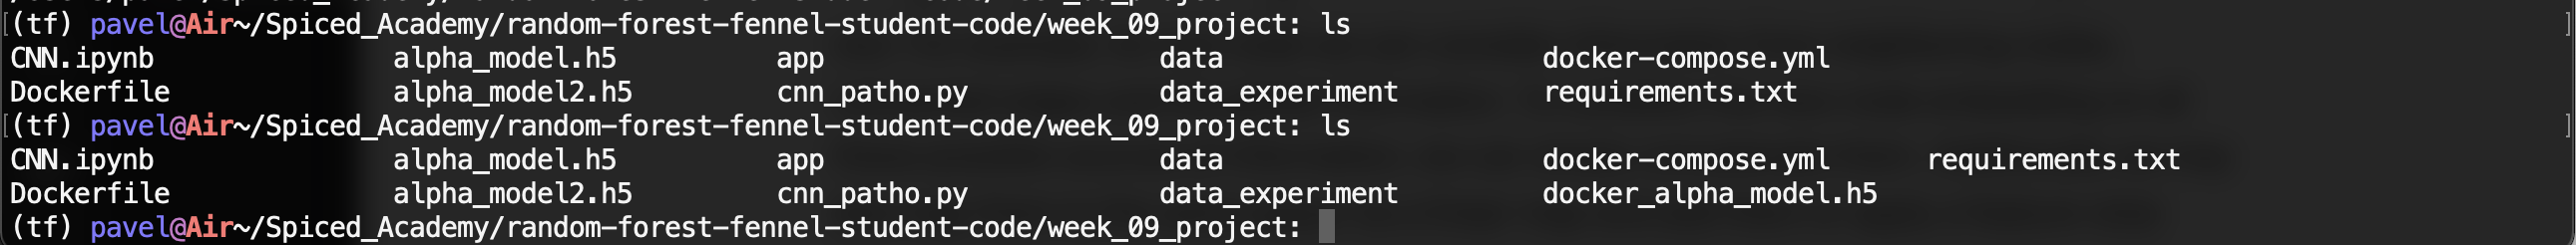

This is a proof of concept that an entire backend docker file can be pushed onto a cloud server to use powerful GPUs for training purposes. The flexibility of using a docker image is a very powerful asset in any project. The docker image can be developed locally, uploaded and easily moved between cloud servers if needed.

My docker image is available publicly, you can download and run it with the following command:

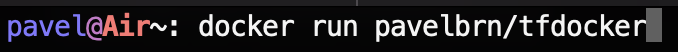

### Conclusion

Our model has an accuracy of 92% during training but returns an accuracy of 83% when applied on the test set. This implies that our CNN trained model is overfitting. We can try to introduce another regularization technique, for example early stopping or reduce nodes in dense layers we use.